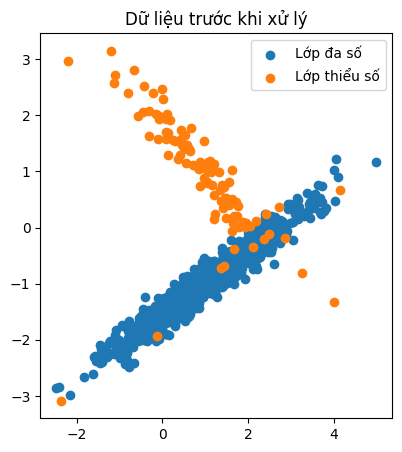

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Tạo dữ liệu mẫu
# ... existing code ...

# Tạo dữ liệu mẫu
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,  # Thêm tham số này
    n_repeated=0,   # Thêm tham số này
    weights=[0.9, 0.1],
    random_state=42
)

# ... existing code ...

# Vẽ dữ liệu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Lớp đa số')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Lớp thiểu số')
plt.title('Dữ liệu trước khi xử lý')
plt.legend()

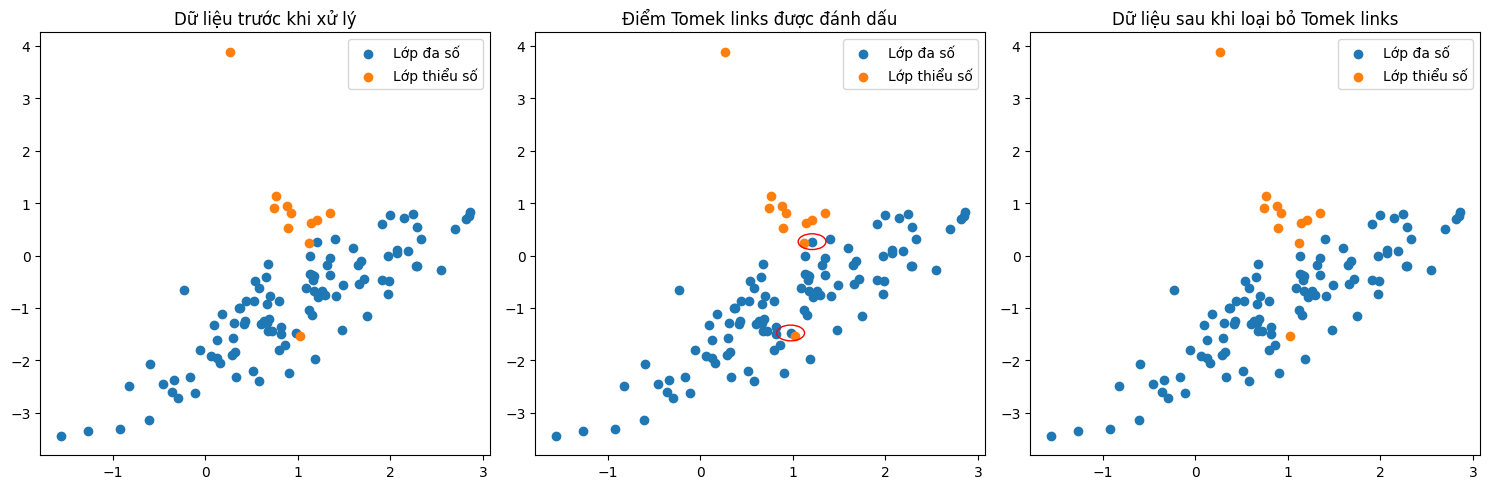

Số lượng mẫu trước khi xử lý: 110
Số lượng mẫu sau khi xử lý: 108
Số điểm Tomek links được tìm thấy: 2


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks

# Tạo dữ liệu mẫu không cân bằng
X, y = make_classification(
    n_samples=110,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    weights=[0.9, 0.1],  # 90% lớp đa số, 10% lớp thiểu số
    random_state=42
)

# ... existing code ...

# Áp dụng Tomek's Link
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

# Tìm các điểm Tomek links và các cặp điểm tương ứng
removed_indices = np.where(~np.isin(range(len(X)), tl.sample_indices_))[0]
removed_points = X[removed_indices]

# Vẽ đồ thị kết quả
plt.figure(figsize=(15, 5))

# Ảnh 1: Dữ liệu gốc
plt.subplot(1, 3, 1)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Lớp đa số')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Lớp thiểu số')
plt.title('Dữ liệu trước khi xử lý')
plt.legend()

# Ảnh 2: Đánh dấu các điểm Tomek links
plt.subplot(1, 3, 2)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Lớp đa số')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Lớp thiểu số')
for point in removed_points:
    circle = plt.Circle((point[0], point[1]), 0.15, fill=False, color='red')
    plt.gca().add_patch(circle)
plt.title('Điểm Tomek links được đánh dấu')
plt.legend()

# Ảnh 3: Dữ liệu sau khi loại bỏ Tomek links
plt.subplot(1, 3, 3)
# Chỉ vẽ các điểm không phải là Tomek links
plt.scatter(X_res[y_res==0][:, 0], X_res[y_res==0][:, 1], label='Lớp đa số')
plt.scatter(X_res[y_res==1][:, 0], X_res[y_res==1][:, 1], label='Lớp thiểu số')
plt.title('Dữ liệu sau khi loại bỏ Tomek links')
plt.legend()

# ... existing code ...

# ... existing code ...
plt.legend()

plt.tight_layout()
plt.show()

# In số lượng mẫu trước và sau khi xử lý
print("Số lượng mẫu trước khi xử lý:", len(X))
print("Số lượng mẫu sau khi xử lý:", len(X_res))
print("Số điểm Tomek links được tìm thấy:", len(removed_points))

In [29]:
X_res.shape, y_res.shape

((116, 2), (116,))